# deep Q learning
---
In this notebook, I will implement an agent which uses deep Q learning.

### 1. Import the Necessary Packages

In [1]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"

In [2]:
!python -m pip install 'numpy==1.19.5' 'prompt-toolkit<2.0.0,>=1.0.15' 'jupyter-client>=7.0.0' 'jsonschema>=3.0.1' 'widgetsnbextension==3.0.0'
!pip -q install ./python

    100% |████████████████████████████████| 13.4MB 1.2MB/s eta 0:00:01   66% |█████████████████████▎          | 8.9MB 42.9MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 22.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 18.8MB/s ta 0:00:01
    100% |████████████████████████████████| 2.5MB 9.5MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 18.5MB/s ta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0
  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Found existing installation: widgetsnbextension 3.1

In [3]:
from unityagents import UnityEnvironment
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [4]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
from dqn_agent import Agent

agent = Agent(37, 4, 0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 100	Average Score: 0.42
Episode 200	Average Score: 4.37
Episode 300	Average Score: 7.49
Episode 400	Average Score: 10.21
Episode 500	Average Score: 12.54
Episode 516	Average Score: 13.05
Environment solved in 416 episodes!	Average Score: 13.05


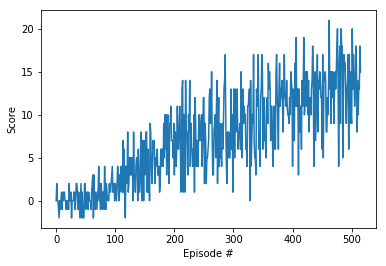

In [5]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for _ in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action.astype(int))[brain_name]
            next_state = env_info.vector_observations[0] 
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]                 
            agent.step(state, action, reward, next_state, done) 
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('reward')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [6]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0
while True:
    action = agent.act(state, 0.1)
    env_info = env.step(action.astype(int))[brain_name]
    next_state = env_info.vector_observations[0] 
    reward = env_info.rewards[0]                   
    done = env_info.local_done[0] 
    
    score += reward
    state = next_state
    if done:
        break
    
print(f"Score: {score}")
            
env.close()

Score: 13.0
